In [13]:
# Import the necessary libraries

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [14]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') ]) # 10 output neurons for 10 digits

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 5s 6ms/step - loss: 0.3144 - accuracy: 0.9136 - val_loss: 0.1472 - val_accuracy: 0.9588
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1453 - accuracy: 0.9572 - val_loss: 0.1071 - val_accuracy: 0.9685
Epoch 3/10
844/844 [==============================] - 4s 5ms/step - loss: 0.1006 - accuracy: 0.9708 - val_loss: 0.0930 - val_accuracy: 0.9737
Epoch 4/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.0852 - val_accuracy: 0.9748
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0587 - accuracy: 0.9830 - val_loss: 0.0733 - val_accuracy: 0.9772
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0794 - val_accuracy: 0.9780
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0384 - accuracy: 0.9888 - val_loss: 0.0732 - val_accuracy: 0.9773
Epoch 

In [23]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'\n\n Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9788


 Test accuracy: 0.9787999987602234


In [20]:
# Make predictions
predictions = model.predict(test_images)
predictions

313/313 [==============================] - 1s 2ms/step


array([[3.4913321e-09, 3.8482972e-09, 1.7225781e-06, ..., 9.9964523e-01,
        6.8095183e-08, 1.5896283e-07],
       [1.3947004e-08, 3.1922152e-06, 9.9999446e-01, ..., 2.9059453e-16,
        4.3087240e-08, 1.3912994e-12],
       [4.9815230e-07, 9.9846441e-01, 8.4229199e-05, ..., 3.7568924e-04,
        9.2406722e-04, 5.0635599e-06],
       ...,
       [1.4518253e-13, 5.3151163e-13, 1.2923513e-14, ..., 1.6227061e-08,
        1.4664092e-08, 1.2024051e-06],
       [7.7179840e-10, 3.6848191e-13, 2.2096425e-13, ..., 6.6148701e-12,
        5.4738525e-06, 9.8982041e-14],
       [2.9286417e-08, 1.6210554e-12, 1.2010139e-08, ..., 7.6791516e-15,
        3.8844511e-10, 1.3301213e-12]], dtype=float32)

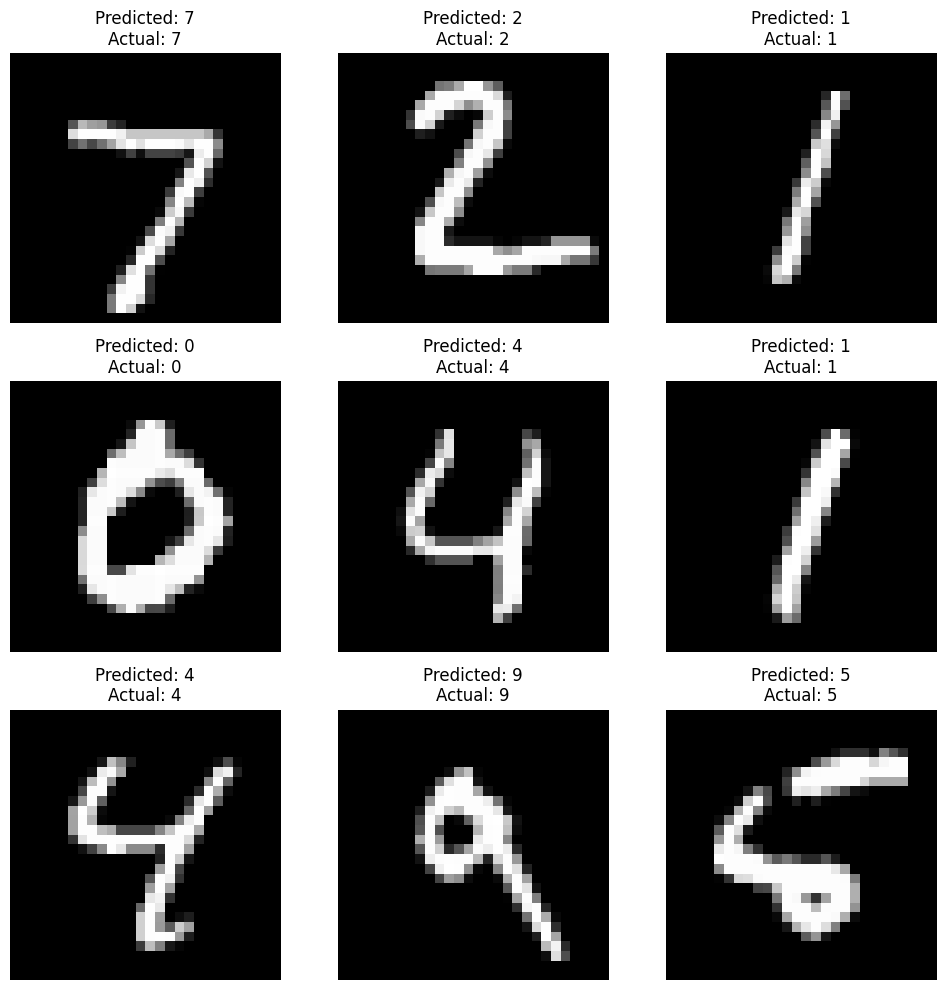

In [21]:
# Visualize a few predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}\nActual: {test_labels[i].argmax()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [22]:
print(f'Test accuracy: {round(test_accuracy,2)}')

Test accuracy: 0.98
